In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Importing and Testing the VGGish System

Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset

In [2]:
!pip install numpy scipy
!pip install resampy tensorflow-gpu==1.15.0 tf_slim six soundfile
#%tensorflow_version 1.x

     |████████████████████████████████| 411.5MB 29kB/s 
     |████████████████████████████████| 122kB 12.3MB/s 
     |████████████████████████████████| 3.8MB 41.2MB/s 
     |████████████████████████████████| 512kB 35.2MB/s 
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0


In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 34124 (delta 0), reused 6 (delta 0), pack-reused 34118
Receiving objects: 100% (34124/34124), 512.42 MiB | 28.72 MiB/s, done.
Resolving deltas: 100% (21904/21904), done.
Checking out files: 100% (2497/2497), done.


In [4]:
# Grab the VGGish model
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277M  100  277M    0     0  42.5M      0  0:00:06  0:00:06 --:--:-- 49.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73020  100 73020    0     0   127k      0 --:--:-- --:--:-- --:--:--  127k


In [5]:
# Copy the source files to the current directory.
!cp -a models/research/audioset/. .
!cp vggish/* ./
!ls

drive		 vggish_inference_demo.py  vggish_slim.py
mel_features.py  vggish_input.py	   vggish_smoke_test.py
models		 vggish_model.ckpt	   vggish_train_demo.py
README.md	 vggish_params.py	   yamnet
sample_data	 vggish_pca_params.npz
vggish		 vggish_postprocess.py


In [6]:
# Run the test, which also loads all the necessary functions.
from vggish_smoke_test import *

W0417 18:18:57.507499 140202539808640 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/compat/v2_compat.py:68: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term



Testing your install of VGGish

Log Mel Spectrogram example:  [[-4.47297436 -4.29457354 -4.14940631 ... -3.9747003  -3.94774997
  -3.78687669]
 [-4.48589533 -4.28825497 -4.139964   ... -3.98368686 -3.94976505
  -3.7951698 ]
 [-4.46158065 -4.29329706 -4.14905953 ... -3.96442484 -3.94895483
  -3.78619839]
 ...
 [-4.46152626 -4.29365061 -4.14848608 ... -3.96638113 -3.95057575
  -3.78538167]
 [-4.46152595 -4.2936572  -4.14848104 ... -3.96640507 -3.95059567
  -3.78537143]
 [-4.46152565 -4.29366386 -4.14847603 ... -3.96642906 -3.95061564
  -3.78536116]]


W0417 18:19:01.896394 140202539808640 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/contrib/layers/python/layers/layers.py:1057: apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
W0417 18:19:02.010694 140202539808640 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


VGGish embedding:  [0.         0.         0.         0.         0.         0.
 0.         0.16137296 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.8069576
 0.         0.         0.         0.         0.         0.
 0.         0.3679275  0.03582403 0.         0.         0.
 0.         0.38027024 0.13755944 0.91747046 0.8065635  0.
 0.         0.         0.         0.04036278 0.7076244  0.
 0.4978391  0.24081801 0.21565425 0.884923   1.1956803  0.67061967
 0.20779455 0.01639876 0.17471857 0.         0.         0.25100824
 0.         0.         0.14607921 0.         0.39887047 0.3054212
 0.12896752 0.         0.         0.         0.         0.
 0.5385138  0.         0.         0.04941109 0.42527407 0.18537292
 0.         0.         0.14753528 0.         0.         0.6993388
 0.45541185 0.05174845 0.         0.01992536 0.         0.
 0.51815784 0.5655761  0.65879744 0.         0.         0.41056335
 0.         0.         0.         0.2576519

#Using the VGGish System

In [0]:
import pandas as pd       
import os 
import math 
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os
import tensorflow as tf
import vggish_slim
import vggish_params
import vggish_input
from time import time

In [0]:
def CreateVGGishNetwork(hop_size=0.96):   # Hop size is in seconds.
  """Define VGGish model, load the checkpoint, and return a dictionary that points
  to the different tensors defined by the model.
  """
  vggish_slim.define_vggish_slim()
  checkpoint_path = 'vggish_model.ckpt'
  vggish_params.EXAMPLE_HOP_SECONDS = hop_size
  
  vggish_slim.load_vggish_slim_checkpoint(sess, checkpoint_path)

  features_tensor = sess.graph.get_tensor_by_name(
      vggish_params.INPUT_TENSOR_NAME)
  embedding_tensor = sess.graph.get_tensor_by_name(
      vggish_params.OUTPUT_TENSOR_NAME)

  layers = {'conv1': 'vggish/conv1/Relu',
            'pool1': 'vggish/pool1/MaxPool',
            'conv2': 'vggish/conv2/Relu',
            'pool2': 'vggish/pool2/MaxPool',
            'conv3': 'vggish/conv3/conv3_2/Relu',
            'pool3': 'vggish/pool3/MaxPool',
            'conv4': 'vggish/conv4/conv4_2/Relu',
            'pool4': 'vggish/pool4/MaxPool',
            'fc1': 'vggish/fc1/fc1_2/Relu',
            'fc2': 'vggish/fc2/Relu',
            'embedding': 'vggish/embedding',
            'features': 'vggish/input_features',
         }
  g = tf.get_default_graph()
  for k in layers:
    layers[k] = g.get_tensor_by_name( layers[k] + ':0')
    
  return {'features': features_tensor,
          'embedding': embedding_tensor,
          'layers': layers,
         }

"""
THERE IS A VERSION TO GET EMBEDDINGS FROM EVERY LAYER BUT MAKES THE PROCESS TOO SLOW
THERE IS A VERSION FOR WHITENING AND COMPLIANCE WITH 8M-YOUTUBE FORMAT IN THE ORIGINAL NOTEBOOK
"""

def EmbeddingsFromVGGish(vgg, x, sr):
  '''Run the VGGish model, starting with a sound (x) at sample rate
  (sr). Return a dictionary of embeddings from the different layers
  of the model.'''
  # Produce a batch of log mel spectrogram examples.
  input_batch = vggish_input.waveform_to_examples(x, sr)
  # print('Log Mel Spectrogram example: ', input_batch[0])
  
  [embedding_batch] = sess.run([vgg['embedding']],
                               feed_dict={vgg['features']: input_batch})
    
  return embedding_batch

In [0]:
# Test these new functions with the original test.
HOP_SIZE = 0.1
tf.reset_default_graph()
sess = tf.Session()
vgg = CreateVGGishNetwork(HOP_SIZE)

In [27]:
SAMPLE_RATE = 16000
data_folder_path = "/content/drive/My Drive/DLAS/data/speech-accent-archive/"
fname_f = data_folder_path + 'recordings/recordings_wav/' + "english483.wav" # english76.mp3 and english483.mp3 
x, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 5, offset= 0, res_type='kaiser_fast') # Chopping audio

x.shape

(80000,)

In [30]:
embedding_batch = EmbeddingsFromVGGish(vgg, x, sr)
embedding_batch.shape
embedding_batch.max()

1.9180474

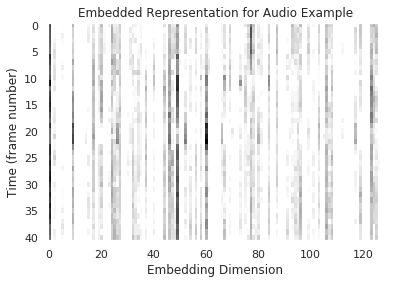

In [31]:
plt.imshow(embedding_batch, 
           aspect='auto', cmap='binary')
plt.xlabel('Embedding Dimension')
plt.ylabel('Time (frame number)')
plt.title('Embedded Representation for Audio Example')
plt.grid(False);

In [0]:
SAMPLE_RATE = 16000
AUDIO_DURATION = 5
OFFSET = 7.5
data_folder_path = "/content/drive/My Drive/DLAS/data/speech-accent-archive/recordings/recordings_wav/"
embeddings = []
start_time = time()
for i, audio_file in enumerate(sorted(os.listdir(data_folder_path))):
  fname_f = data_folder_path + audio_file  
  x, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration=AUDIO_DURATION, offset=OFFSET, res_type='kaiser_fast')
  embedding_batch = EmbeddingsFromVGGish(vgg, x, sr)
  embeddings.append(embedding_batch)
  if i%10==0:
    print(i, audio_file,time()-start_time)

embeddings = np.array(embeddings)
embeddings.shape

(0, 'afrikaans1.wav', 0.22910094261169434)
(10, 'albanian4.wav', 2.2681570053100586)
(20, 'amharic11.wav', 4.326422929763794)
(30, 'amharic20.wav', 6.391413927078247)
(40, 'arabic100.wav', 8.438601016998291)
(50, 'arabic18.wav', 10.487336874008179)
(60, 'arabic27.wav', 12.525739908218384)
(70, 'arabic36.wav', 14.710767030715942)
(80, 'arabic45.wav', 16.809370040893555)
(90, 'arabic54.wav', 22.521136045455933)
(100, 'arabic63.wav', 24.631850957870483)
(110, 'arabic72.wav', 26.809772968292236)
(120, 'arabic81.wav', 28.971210956573486)
(130, 'arabic90.wav', 31.1307270526886)
(140, 'armenian1.wav', 33.320098876953125)
(150, 'azerbaijani2.wav', 35.445499897003174)
(160, 'bambara5.wav', 37.796457052230835)
(170, 'belarusan3.wav', 39.93077993392944)
(180, 'bengali2.wav', 42.05474901199341)
(190, 'bosnian3.wav', 44.20123100280762)
(200, 'bulgarian12.wav', 46.30879807472229)
(210, 'bulgarian5.wav', 48.37578892707825)
(220, 'cantonese12.wav', 50.441126108169556)
(230, 'cantonese21.wav', 52.49743

(2138, 41, 128)

In [0]:
save_path = '/content/drive/My Drive/DLAS/data/speech-accent-archive/recordings/audio_embeddings_hop_{}_dur_{}_offset_{}.npy'.format(HOP_SIZE, AUDIO_DURATION, int(OFFSET))
np.save(save_path, embeddings)